# Import Libraries and Load Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# import seaborn as sns
# sns.set(style="ticks")

In [2]:
df = pd.read_csv('data/AppleStore.csv')
df.head()

,Unnamed: 0,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,prime_genre,sup_devices.num,lang.num
0,1,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,Games,38,10
1,2,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,Productivity,37,23
2,3,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,Weather,37,3
3,4,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,Shopping,37,9
4,5,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,Reference,37,45


# Check Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 13 columns):
Unnamed: 0          7197 non-null int64
track_name          7197 non-null object
size_bytes          7197 non-null int64
currency            7197 non-null object
price               7197 non-null float64
rating_count_tot    7197 non-null int64
rating_count_ver    7197 non-null int64
user_rating         7197 non-null float64
user_rating_ver     7197 non-null float64
ver                 7197 non-null object
prime_genre         7197 non-null object
sup_devices.num     7197 non-null int64
lang.num            7197 non-null int64
dtypes: float64(3), int64(6), object(4)
memory usage: 731.1+ KB


# Draw Graphs

## Matplotlib

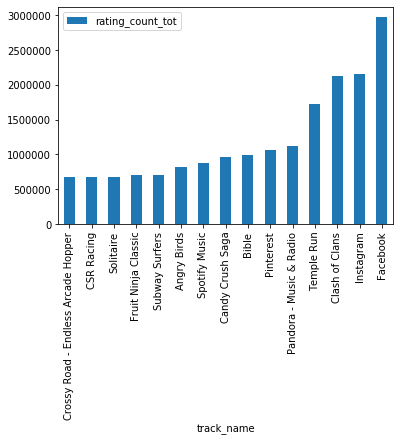

In [4]:
#TAR 4
df.sort_values(['rating_count_tot'])[-15:][['track_name', 'rating_count_tot']].set_index('track_name').plot(kind='bar')

C:\Users\idoya\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 27880 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\idoya\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 25991 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\idoya\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 12398 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\idoya\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 22810 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\idoya\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 12356 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\idoya\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 12502 missing from c

C:\Users\idoya\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 12463 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\idoya\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 12496 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\idoya\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 12452 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\idoya\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 12488 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\idoya\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 12399 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\idoya\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 12376 missing from current fon

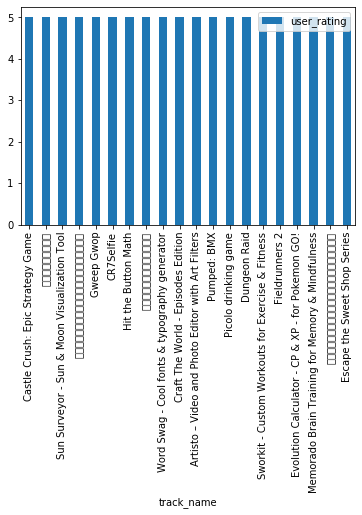

In [5]:
#TAR 5
df.sort_values(['user_rating'])[-20:][['track_name', 'user_rating']].set_index('track_name').plot(kind='bar')

C:\Users\idoya\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\idoya\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


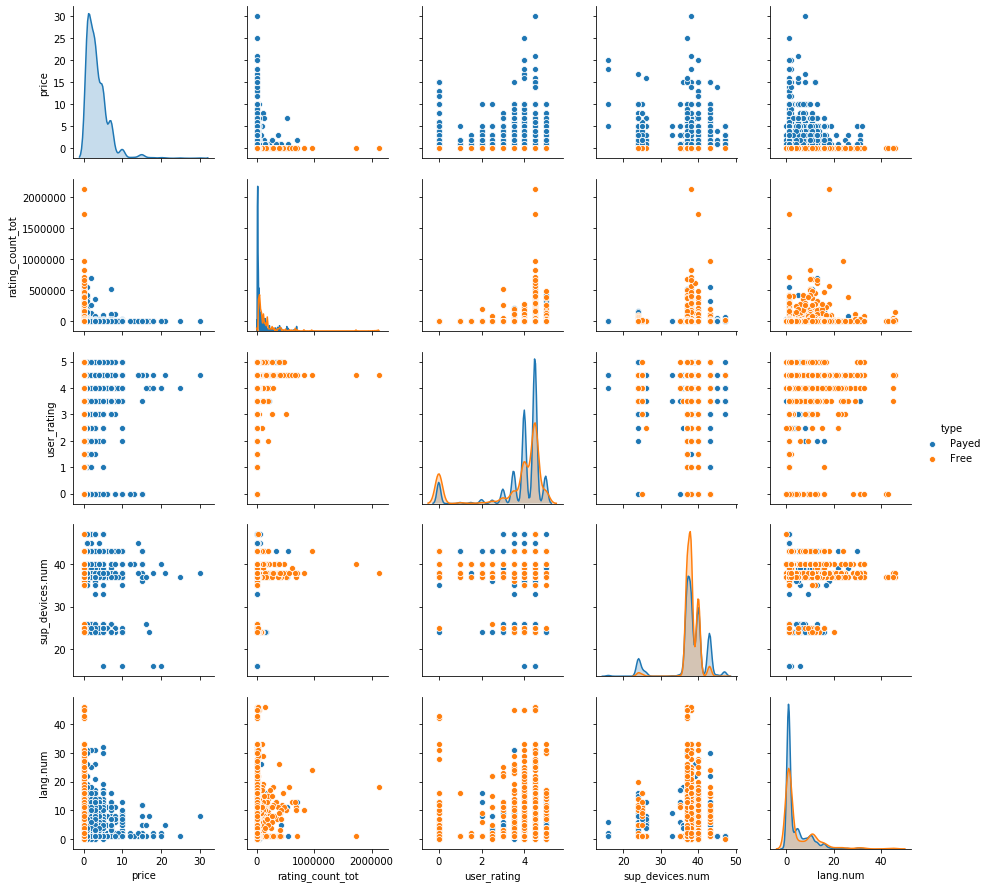

In [3]:
#Tar 6
import seaborn as sns
dfTmp = df[df["prime_genre"] == "Games"].copy()
rule = ['Free' if x else 'Payed' for x in dfTmp['price'] == 0]
dfTmp['type'] = rule
sns.pairplot(dfTmp[['type', 'price', 'rating_count_tot', 'user_rating', 'sup_devices.num', 'lang.num']], hue="type")
plt.show()

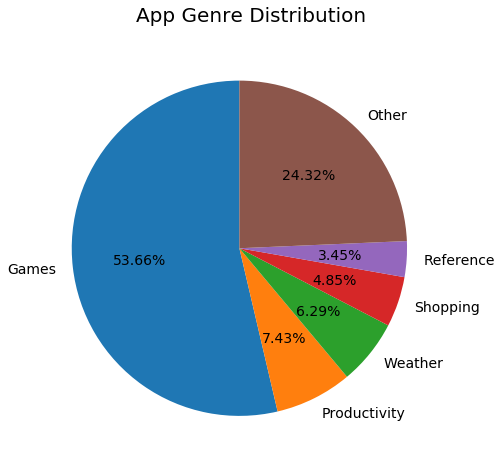

In [12]:
import matplotlib.pyplot as plt

sliceIndex = 5
labels = df['prime_genre'].unique()[:sliceIndex]
labels = np.append(labels, ["Other"])
sizes = df['prime_genre'].value_counts()[:sliceIndex]
sizes = np.append(sizes, [len(df)-df['prime_genre'].value_counts()[:sliceIndex].sum()])

fig, ax = plt.subplots(figsize=(7, 7), tight_layout=True)
ax.pie(sizes, labels=labels, autopct='%.2f%%', startangle=90, textprops={"fontsize": 14})
ax.axis('equal')
fig.suptitle('App Genre Distribution', fontsize=20)

plt.show()

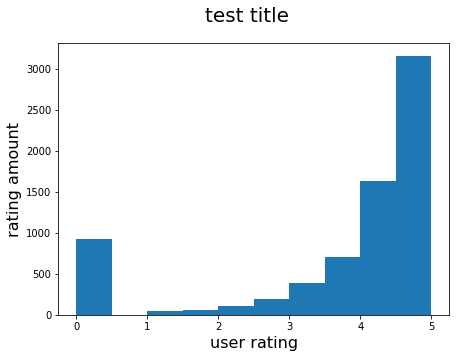

In [27]:
fig, axs = plt.subplots(figsize=(7, 5), tight_layout=False)
axs.hist(df["user_rating"])
fig.suptitle('test title', fontsize=20)
plt.xlabel('user rating', fontsize=16)
plt.ylabel('rating amount', fontsize=16)
plt.show()